<a href="https://colab.research.google.com/github/lamld203844/biosignal-processing/blob/main/final/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

1. Each student, by the order in the class list, processing the EEG data upload in file tab in the Teams class.
2. Requirements
    - Read data
    - Extract the channels data
    - Plot the original data in time-series with the full of title, units
    - Analyze the data to identify signal and noises
    - Design filters to eliminate the DC component, Electricity noise, and others (if contaminated)
    - Apply the filters to the data to reduce the noises and increase the SNR (signal to noise ratio) as well. Show the noise reduction and SNR increasing values
    - Show the difference between the original data and processed data in both time domain and frequency domain
    - Design spectrogram for each data channels with frequency resolution of 1 Hz
3. Write report
4. Present the works in steps, algorithms (if applicable), purposes, and goals
5. Show the parameters for the design jobs, explain the reason to choose that parameters.
6. Show each results and discuss about the results
<hr/>

Analyze directory tree and role of each file

In [ ]:
sub-NORB00027
    └── ses-1
        ├── eeg
        │   ├── sub-NORB00027_ses-1_coordsystem.json # coordinate system
        │   ├── sub-NORB00027_ses-1_electrodes.tsv # electrodes: name, position(x,y,z), metadata: type + material
        │   ├── sub-NORB00027_ses-1_task-EEG_channels.tsv # el 
        │   ├── sub-NORB00027_ses-1_task-EEG_eeg.edf
        │   ├── sub-NORB00027_ses-1_task-EEG_eeg.json
        │   └── sub-NORB00027_ses-1_task-EEG_events.tsv
        └── sub-NORB00027_ses-1_scans.tsva

# 1. Read data

- First, we need to load the EEG data from the provided files. The **`sub-NORB00027_ses-1_task-EEG_eeg.edf`** file contains the raw EEG data.
- We’ll use a library **`mne`** (MNE-Python) to read the data, can be installed via **`pip install mne`**.

In [1]:
import mne
import matplotlib.pyplot as plt

# Load the EEG data
data_path = '/workspaces/biosignal-processing/final/sub-NORB00027/ses-1/eeg/sub-NORB00027_ses-1_task-EEG_eeg.edf'
raw = mne.io.read_raw_edf(data_path, preload=True)
print('================= Basic information ===========================')
raw

Extracting EDF parameters from /workspaces/biosignal-processing/final/sub-NORB00027/ses-1/eeg/sub-NORB00027_ses-1_task-EEG_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 118399  =      0.000 ...   591.995 secs...
================= Basic information ===========================


Measurement date,"January 01, 2023 08:34:15 GMT"
Experimenter,Unknown
Participant,M
Digitized points,Not available
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [3]:
d = raw.to_data_frame()
d

,time,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,FZ,CZ,PZ
0,0.000,37.794060,38.802208,35.275967,41.127494,32.365882,67.594096,31.063564,48.486317,17.823710,21.595655,38.462062,43.636654,22.867763,32.669299,10.572697,32.479961,41.396177,38.978471,48.259253
1,0.005,40.119658,42.150950,36.210545,44.238100,33.409961,71.876571,33.488515,53.148359,16.666285,20.902811,39.744096,46.530156,23.560606,37.821512,8.388764,37.816365,43.140376,41.414656,52.910449
2,0.010,39.887098,43.190215,33.874101,45.966214,31.437811,67.362611,31.871881,49.418725,16.434800,19.979021,37.413124,48.266258,22.405867,39.460852,7.239326,38.280401,44.652015,42.458735,49.654612
3,0.015,37.794060,41.920002,31.888124,46.542252,29.465662,65.047760,30.370721,48.719419,16.897770,20.440916,35.548346,49.192179,21.020181,37.821512,9.997978,36.888295,43.605496,40.950620,48.026693
4,0.020,34.538222,38.802208,30.603080,45.274968,30.509741,63.658850,31.409985,50.817338,17.129255,19.979021,34.149763,47.803298,21.020181,36.884746,13.331348,38.512418,41.396177,38.746453,48.724372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118395,591.975,36.398701,34.067780,40.182499,33.869414,40.370489,35.533410,38.684839,32.985027,17.823710,19.055230,39.044805,18.405310,19.403547,29.976097,4.940449,23.199257,38.140340,36.774304,34.305662
118396,591.980,33.840542,32.682093,36.444189,32.026092,38.514348,34.838955,37.530100,33.334680,19.675591,22.057550,35.781444,18.289570,17.325017,31.732533,5.400225,25.287416,36.512421,35.150181,34.770782
118397,591.985,30.003305,30.026194,32.004946,30.528393,35.034084,32.524104,35.451571,31.120210,19.907076,21.364707,32.051888,17.710870,17.209543,30.912863,6.549663,25.403425,34.884502,32.597987,32.677743
118398,591.990,27.328867,28.525034,29.318036,29.721939,32.249873,32.408361,33.834936,30.537455,19.907076,20.902811,28.905076,17.363649,16.170278,33.137682,6.089888,25.751451,32.326343,30.161803,31.166104


# 2. Extract Channels information:
- Once we’ve loaded the data, we’ll extract the EEG channels. These channels represent the electrical activity recorded from different scalp locations.
- We’ll identify the relevant channels (e.g., Fp1, Fp2, Cz, Pz, etc.) and extract their time-series data.

In [4]:
raw

Measurement date,"January 01, 2023 08:34:15 GMT"
Experimenter,Unknown
Participant,M
Digitized points,Not available
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [6]:
# channel information
print(f'Channel names: {raw.ch_names}')
print(f'Number of channels: {len(raw.ch_names)}')

Channel names: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'FZ', 'CZ', 'PZ']
Number of channels: 19


# Plot original signal

Using matplotlib as 2D backend.


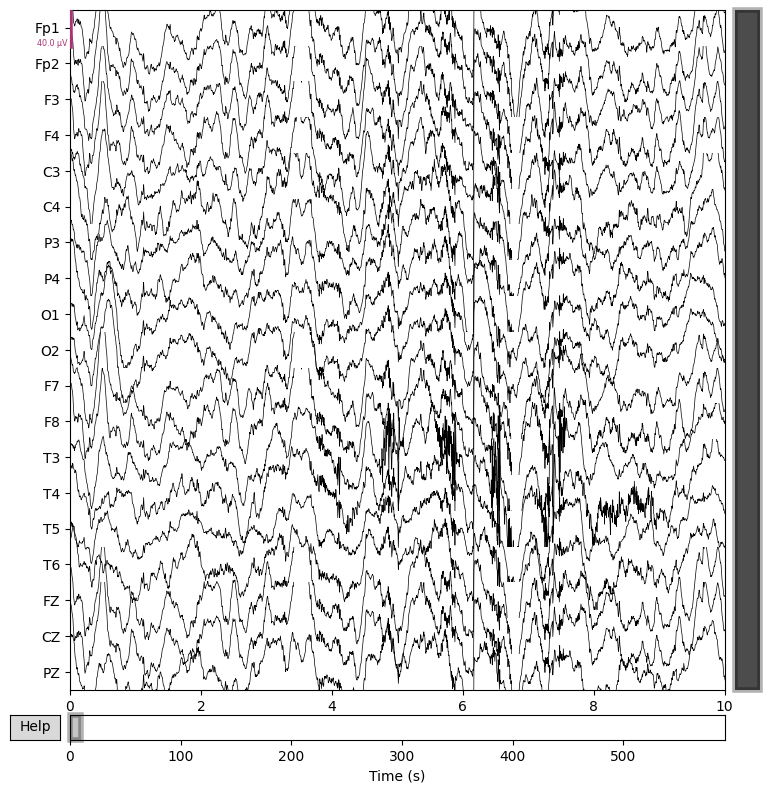

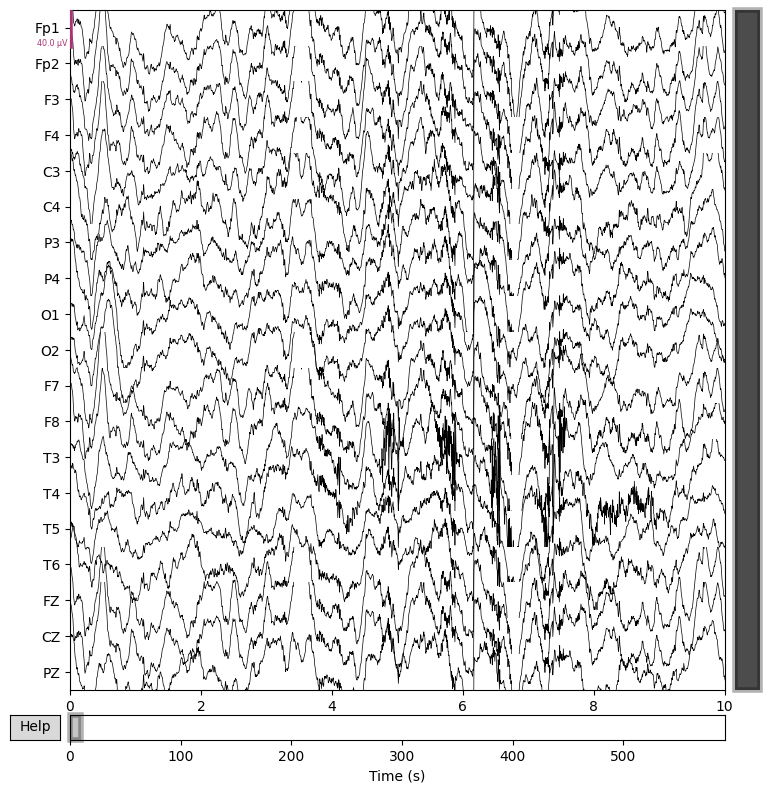

In [8]:
# Plot the original data in time-series with the full title, units
raw.plot()

# Analysis original

Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).


<ipython-input-9-5a391332be32>:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  psd_fig = raw.compute_psd().plot() # power spectral density
<ipython-input-9-5a391332be32>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd_fig = raw.compute_psd().plot() # power spectral density


Text(0.5, 0.98, 'Power Spectral Density of Original EEG Data')

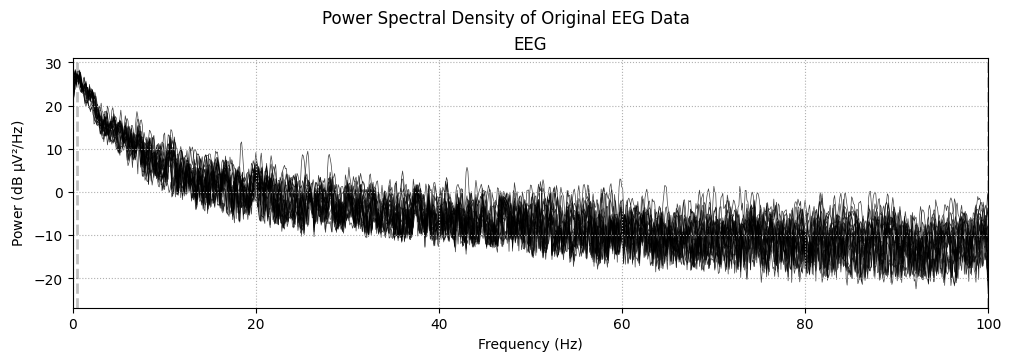

In [9]:
# Analyze the data to identify signal and noises
psd_fig = raw.compute_psd().plot() # power spectral density
psd_fig.suptitle("Power Spectral Density of Original EEG Data")